<a href="https://colab.research.google.com/github/emetcalf-vas/Group19_QM2/blob/main/Hypothesistesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hypothesis Testing:

Null Hypothesis: the observed difference in house pricing is due to chance alone, H0: there is no difference in the mean housing price between county x and county y, H0:

Alternative Hypothesis: the observed difference in house pricing is NOT due to chance alone, Ha: there is a difference in the mean housing price between county x and county y, HA


In [1]:
#This tells python to draw the graphs "inline" - in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics
import seaborn as sns

import pylab
import pandas as pd
import numpy as np
# make the plots (graphs) a little wider by default
pylab.rcParams['figure.figsize'] = (10., 8.)
sns.set(font_scale=1.5)
sns.set_style("white")

In [3]:
df_br = pd.read_csv('Baton_Rouge_LA.csv')
df_lp = pd.read_csv('Livingston_Parish_LA.csv')
df_br.head()
df_lp.head()

,observation_date,MEDLISPRIPERSQUFEE22063
0,2016-07-01,114
1,2016-08-01,114
2,2016-09-01,116
3,2016-10-01,113
4,2016-11-01,114


In [4]:
def plot_z(test_statistic):
    mu, se= 0, 1 # create two variables, a mean "mu" equal to zero, and standard deviation "se" equal to 1
    x = np.linspace(mu - 3*se, mu + 3*se, 100) # create a range of values from -3 to 3 standard deviations

    plt.plot(x, norm.pdf(x, mu, se)) # plot the normal distribution
    plt.axvline(mu-se*1.96, color='blue', linestyle='dashed', linewidth=1.5,label='µ ± 1.96σ (95% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*1.96, color='blue', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations
    plt.axvline(mu-se*2.58, color='green', linestyle='dashed', linewidth=1.5,label='µ ± 2.58σ (99% confidence)') # plot a vertical line at the mean plus 2 standard deviations
    plt.axvline(mu+se*2.58, color='green', linestyle='dashed', linewidth=1.5)  # plot a vertical line at the mean minus 2 standard deviations

    plt.axvline(test_statistic, color='red', linestyle='solid', linewidth=1.5,label='Test Statistic') # plot a vertical line at the test statistic


    plt.ylim(0,0.4)
    plt.legend()
    plt.title('Z Distribution') # add a title
    plt.show()

In [5]:
def manual_ttest(group1, group2, plot=False): # define a function called "manual_ttest" that takes two groups and a boolean value for whether or not to plot the results as arguments

    desc1, desc2=group1.describe(), group2.describe() # get descriptive statistics for both samples

    n1,std1,mean1 = desc1['count'], desc1['std'] ,desc1['mean'] # get the sample size, standard deviation, and mean of the first sample
    n2,std2,mean2 = desc2['count'], desc2['std'] ,desc2['mean'] # get the sample size, standard deviation, and mean of the second sample

    # calculate standard errors
    se1, se2 = std1**2/n1, std2**2/n2 # '**2' is the same as squaring the number

    # standard error on the difference between the samples
    sed = np.sqrt(se1 + se2)

    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed

    # print the results
    print("Group 1: n=%.0f, mean=%.3f, std=%.3f" % (n1,mean1,std1))
    print("Group 2: n=%.0f, mean=%.3f, std=%.3f" % (n2,mean2,std2))
    print('The t-statistic is %.3f' % t_stat) # print the t-statistic

    if plot==True: # if the plot argument is set to True, plot the results
        groups=pd.DataFrame() # create an empty dataframe
        i=1 # create a counter variable called "i" and set it equal to 1

        for group in [group1, group2]: # loop through each group in the list of groups
            plot_df=pd.DataFrame({'Values': group,'Group':i}) # create a dataframe with the values of the group and a column called "Group" that contains the group number
            groups=groups.append(plot_df) # append the dataframe to the list of dataframes
            i+=1 # increase the counter by 1

        sns.pointplot(data=groups , x='Group', y='Values',errorbar=('ci', 95), color='black', join=False, capsize=.8) # plot the means of the groups with a 95% confidence interval
        plt.title('Comparison of Group Means with 95% Confidence Intervals') # add a title

    return t_stat # return the t-statistic

Group 1: n=102, mean=141.902, std=17.377
Group 2: n=102, mean=135.873, std=18.483
The t-statistic is 2.400


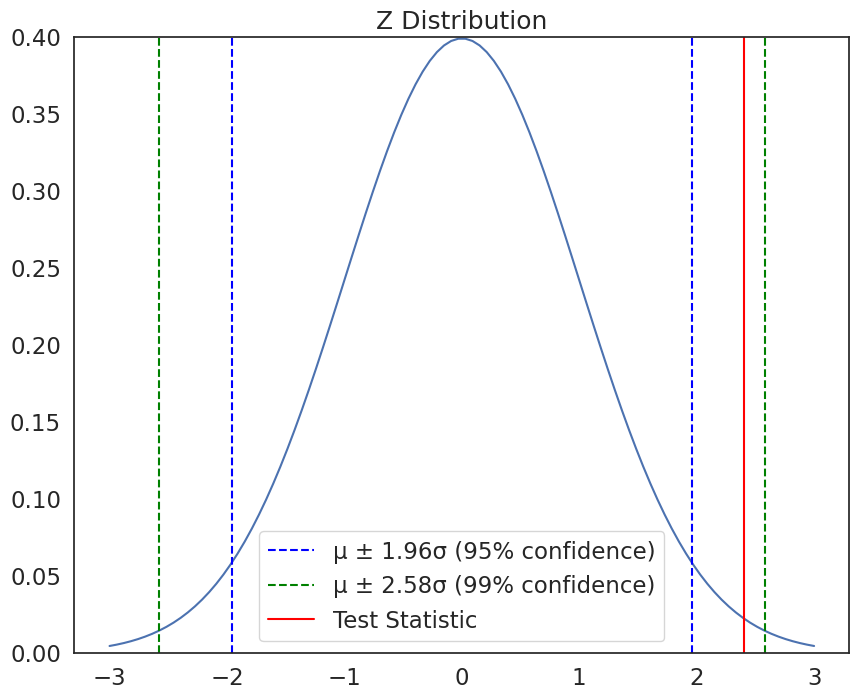

In [6]:
t = manual_ttest(df_br['MEDLISPRIPERSQUFEE12940'],df_lp['MEDLISPRIPERSQUFEE22063'])
plot_z(t)

In [7]:
from scipy.stats import t

# Given data
t_stat = 2.400
df = 102 + 102 - 2  # degrees of freedom
alpha = 0.05

# Calculate the p-value for a two-tailed test
p_value = 2 * (1 - t.cdf(t_stat, df))
p_value

0.017302788806951908

Summary:
The t-statistic of 2.400 suggests a meaningful difference between the two groups. Given a p-value of approximately 0.017, we conclude that there is a statistically significant difference in mean housing prices between the counties.